In [1]:
pip install numpy

In [2]:
import numpy as np

In [3]:
energy_consumption = np.array([1200,1400,2300,2400,2600])
print("energy consumption(in MWh) for different renewable sources:",energy_consumption)

energy consumption(in MWh) for different renewable sources: [1200 1400 2300 2400 2600]


In [4]:
total_consumption = np.sum(energy_consumption)
print("total energy consumption(in MWh) for different renewable sources:",total_consumption)

total energy consumption(in MWh) for different renewable sources: 9900


In [6]:
mean_energy_consumption = np.mean(energy_consumption)
print("mean energy consumption(in MWh) for different renewable sources:",mean_energy_consumption)

mean energy consumption(in MWh) for different renewable sources: 1980.0


In [7]:
median_energy_consumption = np.median(energy_consumption)
print("median energy consumption(in MWh) for different renewable sources:",median_energy_consumption)

median energy consumption(in MWh) for different renewable sources: 2300.0


In [8]:
standard_deviation_energy_consumption = np.std(energy_consumption)
print("standard deviation energy consumption(in MWh) for different renewable sources:",standard_deviation_energy_consumption)

standard deviation energy consumption(in MWh) for different renewable sources: 567.097875150313


In [9]:
reshaped_energy_consumption = energy_consumption.reshape(5,1)
print("reshaped energy consumption(in MWh) for different renewable sources:",reshaped_energy_consumption)

reshaped energy consumption(in MWh) for different renewable sources: [[1200]
 [1400]
 [2300]
 [2400]
 [2600]]


In [10]:
ascending_order_energy_consumption = np.sort(energy_consumption)
print("energy consumption(in MWh) for different renewable sources in ascending order:",ascending_order_energy_consumption)

energy consumption(in MWh) for different renewable sources in ascending order: [1200 1400 2300 2400 2600]


In [11]:
descending_order_energy_consumption = np.sort(energy_consumption)[::-1]
print("energy consumption(in MWh) for different renewable sources in descending order:",descending_order_energy_consumption)

energy consumption(in MWh) for different renewable sources in descending order: [2600 2400 2300 1400 1200]


In [12]:
import pandas as pd

In [14]:
data = {
    'Energy Source': ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass'],
    'Energy Consumption (MWh)': [1200, 1400, 2300, 2400, 2600],
    'cost (Million $)': [200, np.nan, 400, 650, np.nan]
}


In [16]:
energy_df = pd.DataFrame(data)
energy_df.head()

,Energy Source,Energy Consumption (MWh),cost (Million $)
0,Solar,1200,200.0
1,Wind,1400,NaN
2,Hydro,2300,400.0
3,Geothermal,2400,650.0
4,Biomass,2600,NaN


In [18]:
energy_df.isnull().sum()

,0
Energy Source,0
Energy Consumption (MWh),0
cost (Million $),2


In [22]:
#handling missing values
cleaned_df = energy_df.dropna()
cleaned_df.head()

,Energy Source,Energy Consumption (MWh),cost (Million $)
0,Solar,1200,200.000000
1,Wind,1400,416.666667
2,Hydro,2300,400.000000
3,Geothermal,2400,650.000000
4,Biomass,2600,416.666667


In [24]:
#fillna()
energy_df['Energy Consumption (MWh)'].fillna(energy_df['Energy Consumption (MWh)'].mean(), inplace=True)
energy_df['cost (Million $)'].fillna(energy_df['cost (Million $)'].mean(), inplace=True)
energy_df

/tmp/ipython-input-2648350143.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_df['Energy Consumption (MWh)'].fillna(energy_df['Energy Consumption (MWh)'].mean(), inplace=True)
/tmp/ipython-input-2648350143.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,Energy Source,Energy Consumption (MWh),cost (Million $)
0,Solar,1200,200.000000
1,Wind,1400,416.666667
2,Hydro,2300,400.000000
3,Geothermal,2400,650.000000
4,Biomass,2600,416.666667


In [30]:
#cost per MWH
energy_df['cost per MWH'] = energy_df['Energy Consumption (MWh)'] / energy_df['cost (Million $)']
energy_df

,Energy Source,Energy Consumption (MWh),cost (Million $),cost per MWh,cost per MWH
0,Solar,1200,200.000000,6.000000,6.000000
1,Wind,1400,416.666667,3.360000,3.360000
2,Hydro,2300,400.000000,5.750000,5.750000
3,Geothermal,2400,650.000000,3.692308,3.692308
4,Biomass,2600,416.666667,6.240000,6.240000


In [32]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
energy_df[['Energy Consumption (MWh)', 'cost (Million $)']] = scaler.fit_transform(energy_df[['Energy Consumption (MWh)', 'cost (Million $)']])
energy_df

,Energy Source,Energy Consumption (MWh),cost (Million $),cost per MWh,cost per MWH
0,Solar,0.000000,0.000000,6.000000,6.000000
1,Wind,0.142857,0.481481,3.360000,3.360000
2,Hydro,0.785714,0.444444,5.750000,5.750000
3,Geothermal,0.857143,1.000000,3.692308,3.692308
4,Biomass,1.000000,0.481481,6.240000,6.240000


In [34]:
#standardization z-score method - StandaardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
energy_df[['Energy Consumption (MWh)', 'cost (Million $)']] = std_scaler.fit_transform(energy_df[['Energy Consumption (MWh)', 'cost (Million $)']])
energy_df

,Energy Source,Energy Consumption (MWh),cost (Million $),cost per MWh,cost per MWH
0,Solar,-1.375424,-1.519455,6.000000,6.000000
1,Wind,-1.022751,0.000000,3.360000,3.360000
2,Hydro,0.564276,-0.116881,5.750000,5.750000
3,Geothermal,0.740613,1.636336,3.692308,3.692308
4,Biomass,1.093286,0.000000,6.240000,6.240000


In [35]:
#OHE
energy_df = pd.get_dummies(energy_df, columns=['Energy Source'])
energy_df

,Energy Consumption (MWh),cost (Million $),cost per MWh,cost per MWH,Energy Source_Biomass,Energy Source_Geothermal,Energy Source_Hydro,Energy Source_Solar,Energy Source_Wind
0,-1.375424,-1.519455,6.000000,6.000000,False,False,False,True,False
1,-1.022751,0.000000,3.360000,3.360000,False,False,False,False,True
2,0.564276,-0.116881,5.750000,5.750000,False,False,True,False,False
3,0.740613,1.636336,3.692308,3.692308,False,True,False,False,False
4,1.093286,0.000000,6.240000,6.240000,True,False,False,False,False


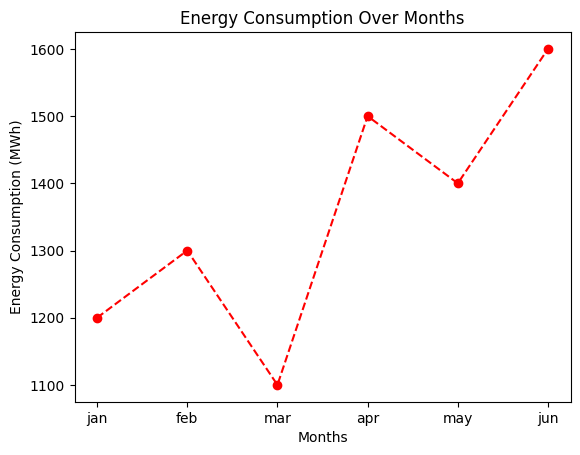

In [36]:
#line plot
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun']
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]
import matplotlib.pyplot as plt
plt.plot(months, energy_consumption, marker ='o', linestyle = '--', color = 'r')
plt.xlabel('Months')
plt.ylabel('Energy Consumption (MWh)')
plt.title('Energy Consumption Over Months')
plt.show()


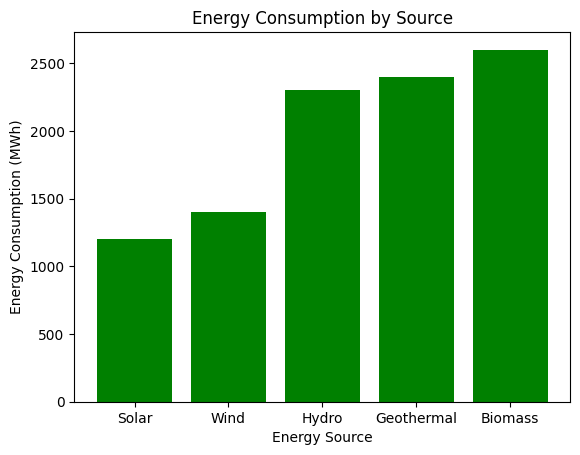

In [38]:
#bar plot
energy_sources = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']
energy_consumption = [1200, 1400, 2300, 2400, 2600]
plt.bar(energy_sources, energy_consumption, color = 'green')
plt.xlabel('Energy Source')
plt.ylabel('Energy Consumption (MWh)')
plt.title('Energy Consumption by Source')
plt.show()

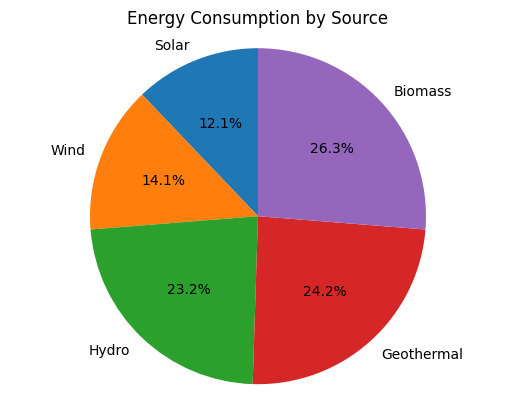

In [3]:
#piechart
energy_sources = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']
energy_consumption = [1200, 1400, 2300, 2400, 2600]
plt.pie(energy_consumption, labels = energy_sources, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.title('Energy Consumption by Source')
plt.show()

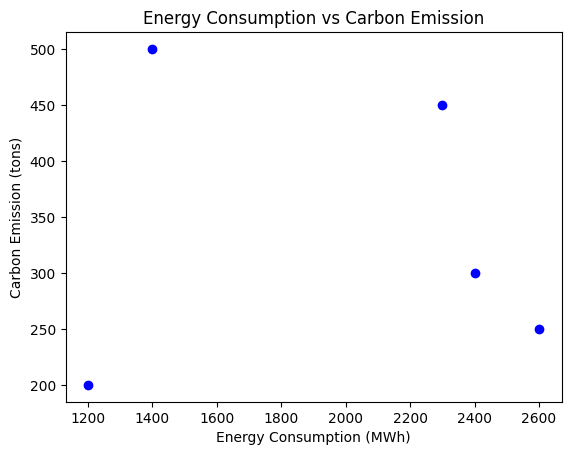

In [10]:
#scatterplot
carbon_emission = [200, 500, 450, 300, 250]
plt.scatter(energy_consumption, carbon_emission, color = 'blue')
plt.xlabel('Energy Consumption (MWh)')
plt.ylabel('Carbon Emission (tons)')
plt.title('Energy Consumption vs Carbon Emission')
plt.show()

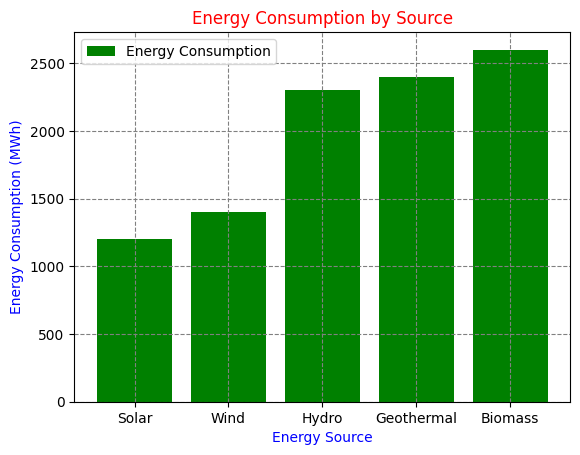

In [16]:
#customized barplot
energy_sources = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']
energy_consumption = [1200, 1400, 2300, 2400, 2600]
plt.bar(energy_sources, energy_consumption, color = 'green')
plt.grid(True, linestyle = '--', color = 'grey')
plt.xlabel('Energy Source', color = 'blue')
plt.ylabel('Energy Consumption (MWh)', color = 'blue')
plt.title('Energy Consumption by Source', color = 'red')
plt.legend(['Energy Consumption'])
plt.show()

In [18]:
import seaborn as sns
import pandas as pd
data = {
    "solar":[1200,1500,1300],
    "wind":[3400,3600,3200],
    "Hydropower":[2900,3100,2800],
    "Biomass":[2500,2700,2400]
}
df = pd.DataFrame(data)
df

,solar,wind,Hydropower,Biomass
0,1200,3400,2900,2500
1,1500,3600,3100,2700
2,1300,3200,2800,2400


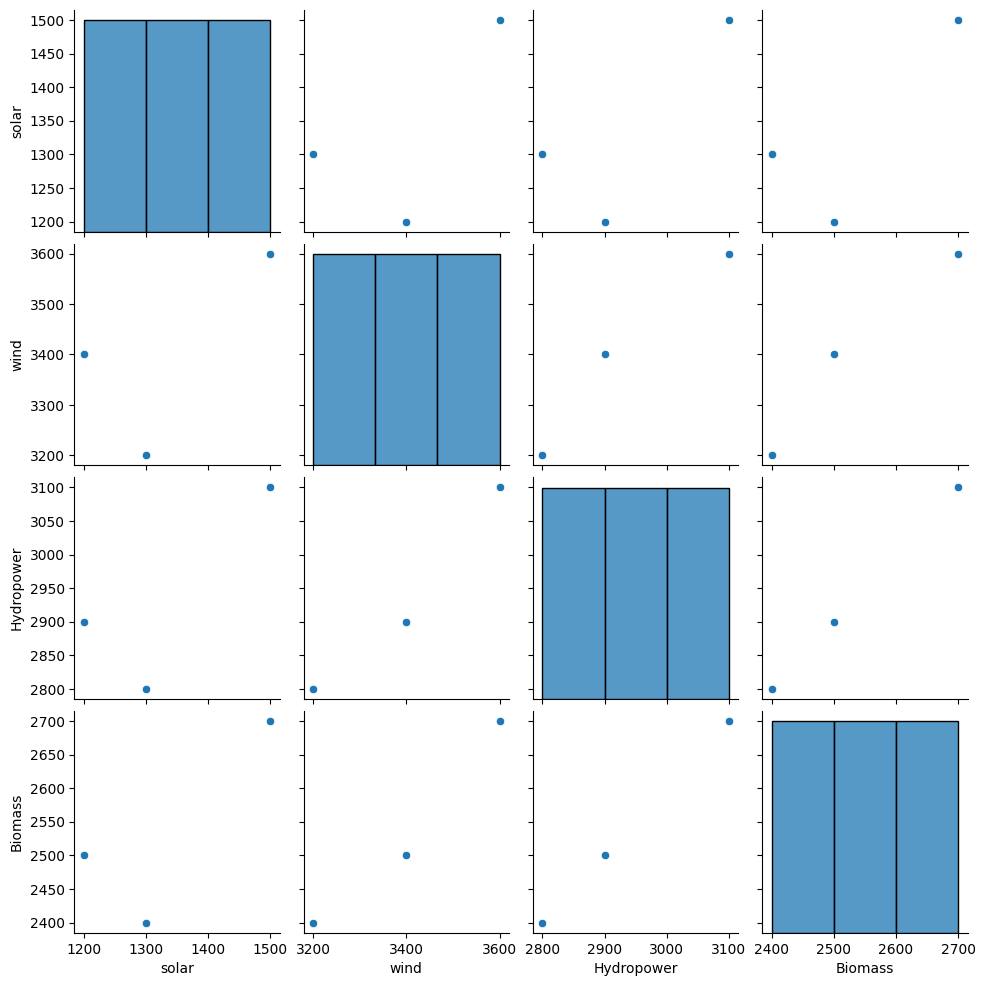

In [19]:
#pairplot
sns.pairplot(df)
plt.show()

In [20]:
#correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,solar,wind,Hydropower,Biomass
solar,1.000000,0.654654,0.785714,0.785714
wind,0.654654,1.000000,0.981981,0.981981
Hydropower,0.785714,0.981981,1.000000,1.000000
Biomass,0.785714,0.981981,1.000000,1.000000


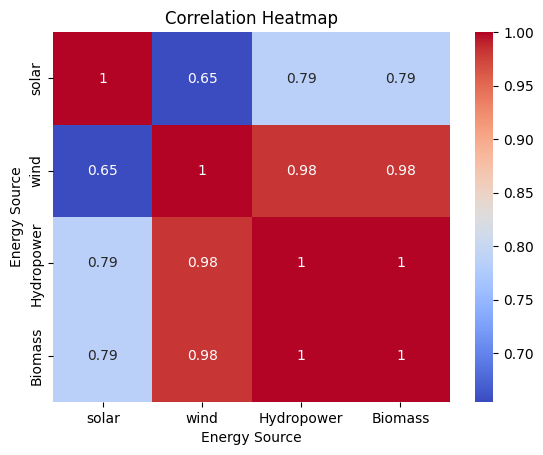

In [22]:
#heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.xlabel('Energy Source')
plt.ylabel('Energy Source')
plt.show()

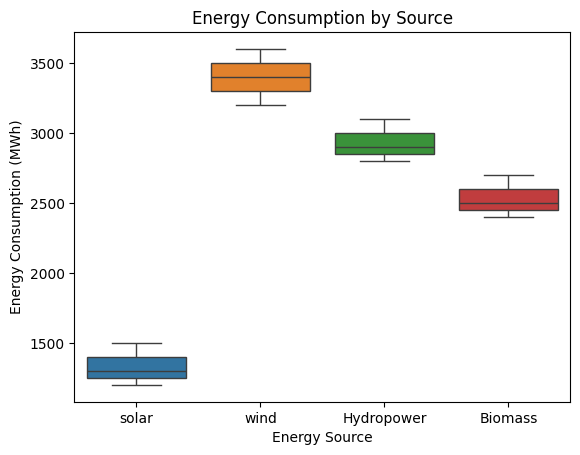

In [23]:
#boxplot
sns.boxplot(data = df)
plt.xlabel('Energy Source')
plt.ylabel('Energy Consumption (MWh)')
plt.title('Energy Consumption by Source')
plt.show()

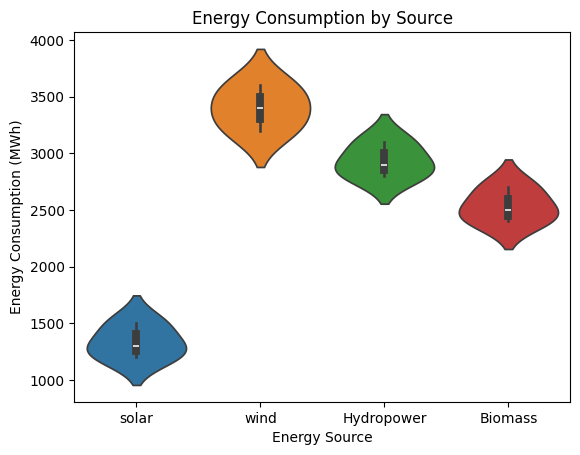

In [24]:
#violinplot
sns.violinplot(data = df)
plt.xlabel('Energy Source')
plt.ylabel('Energy Consumption (MWh)')
plt.title('Energy Consumption by Source')
plt.show()

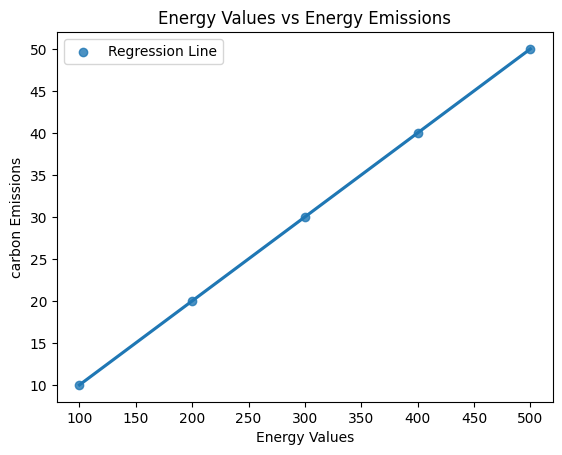

In [26]:
#regressionplot
energy_values = [100,200,300,400,500]
carbon_emissions = [10,20,30,40,50]
sns.regplot(x = energy_values, y = carbon_emissions)
plt.xlabel('Energy Values')
plt.ylabel('carbon Emissions')
plt.title('Energy Values vs Energy Emissions')
plt.legend(['Regression Line'])
plt.show()